# Avocado Dataset Prediction

1.Regression

2.Classification.

In [294]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [295]:
pwd

'C:\\Users\\MI Laptop'

In [296]:
#Reading the Dataset:
df = pd.read_csv('C:\\Users\\MI Laptop\\Downloads\\avocado.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(18249, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [297]:
#Dropping unnecessary Columns:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

False


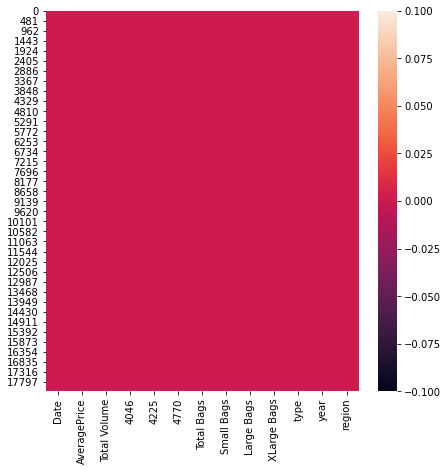

In [299]:
#Checking the null values in the dataset:
print(df.isnull().values.any())
sns.heatmap(df.isnull())

In [167]:
#checking the datatypes:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [168]:
#Now lets check the categorical variable:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print('categorigal variables is :',cat_col,end=" ")

categorigal variables is : ['Date', 'type', 'region'] 

In [169]:
#Check the value count of categorical varibale:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [170]:
#Check the unique value of categorical varibale:
region = list(df['region'].unique())
print(region)

['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston', 'BuffaloRochester', 'California', 'Charlotte', 'Chicago', 'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork', 'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento', 'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina', 'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse', 'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']


Statistical Analysis:

In [171]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [172]:
#from above we can see the average price of avocado is 1.405978 and max is 3.25
#Theres a huge difference between 75% and max range in XLarge Bags possibility of presence of outliers.

Feature Engineering:

In [173]:
#Lets do some feature Engineering:
#renaming the columns name of 4046,4225,4770
df.rename(columns={'4046':'Small-HASS-sold','4225':'Large-HASS-sold','4770':'XLarge-HASS-sold'}, inplace=True)

In [174]:
#Now checking all columns:
columns = list(df.columns)
print(columns)

['Date', 'AveragePrice', 'Total Volume', 'Small-HASS-sold', 'Large-HASS-sold', 'XLarge-HASS-sold', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']


In [ ]:
#From description we can see that Date is a object data type,Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

In [175]:
df['Day'] = pd.to_datetime(df['Date'], format="%Y/%m/%d").dt.day

In [176]:
df['month'] = pd.to_datetime(df['Date'], format="%Y/%m/%d").dt.month

Exploratory Data Analysis

1.Univarite Analysis

2.Multivariate Analysis

3.Bivariate Analysis

4.Here we check the relationship between different independant and dependant variable.

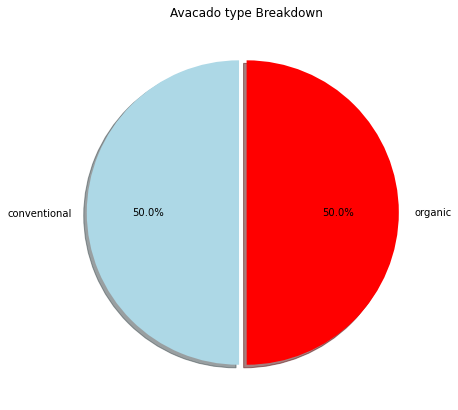

In [177]:
#univariate Analysis:
from pylab import rcParams 
labels = df['type'].value_counts(sort = True).index
sizes =  df['type'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)
 
rcParams['figure.figsize'] = 7,7

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)
plt.title('Avacado type Breakdown')
plt.show()

Observations: 50% is organic type and 50% is conventional type   

In [178]:
df.head()

,Date,AveragePrice,Total Volume,Small-HASS-sold,Large-HASS-sold,XLarge-HASS-sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


Text(0.5, 0, 'Distribution of the average price')

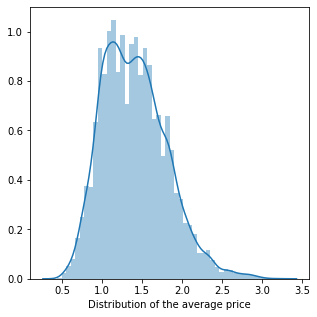

In [179]:
#Univariate Analysis checking the distribution of Average Price:
plt.figure(figsize=(5,5))
sns.distplot(df['AveragePrice'],bins=50)
plt.xlabel('Distribution of the average price')

Observations:
Most of Average price is Distributed in range of 1.0 to 1.8

Text(0.5, 0, 'Avg price of Avocado types')

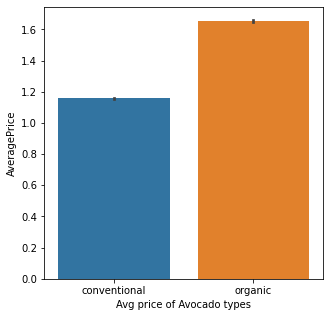

In [181]:
#Bivarite Analysis:
#Checking the relationship between two variables:
plt.figure(figsize=(5,5))
sns.barplot(x='type',y='AveragePrice',data=df)
plt.xlabel('Avg price of Avocado types')

Observations: Organic type are more expensive than Conventional ones

Text(0.5, 0, 'Year Vs Avg-Price')

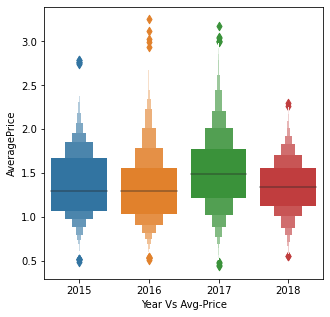

In [183]:
#Bivarite Analysis:
#Checking the relationship between two variables:
plt.figure(figsize=(5,5))
sns.boxenplot(x='year',y='AveragePrice',data=df)
plt.xlabel('Year Vs Avg-Price')

Observations: Avg price was high in 2016 compared to different years.

Text(0.5, 1.0, 'Average price varies compare to different region')

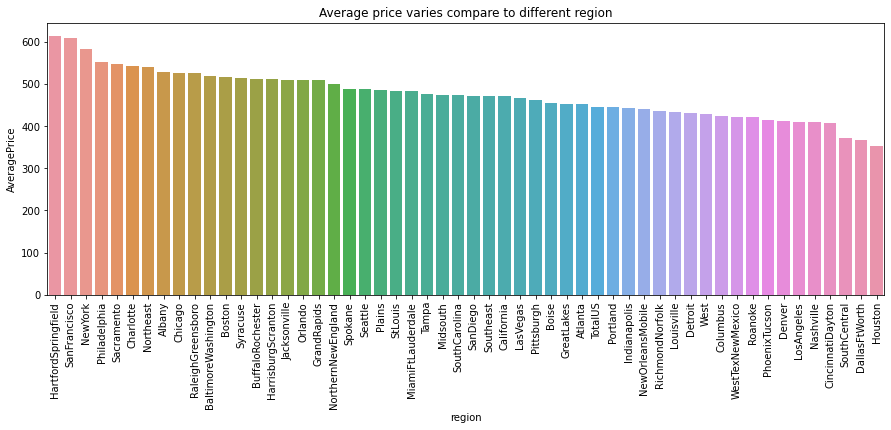

In [190]:
#How Average price varies compare to different region:
region = df.groupby('region')['AveragePrice'].sum().sort_values(ascending=False).reset_index()
# Visualizing by bar plot
plt.figure(figsize=(15,5))
ax = sns.barplot(region['region'],region['AveragePrice'])
plt.xticks(rotation= 90)
plt.title("Average price varies compare to different region")

Observations: HartfordSpringfield being highest and Houston being lowest price to get cheap Avocado.

In [193]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.

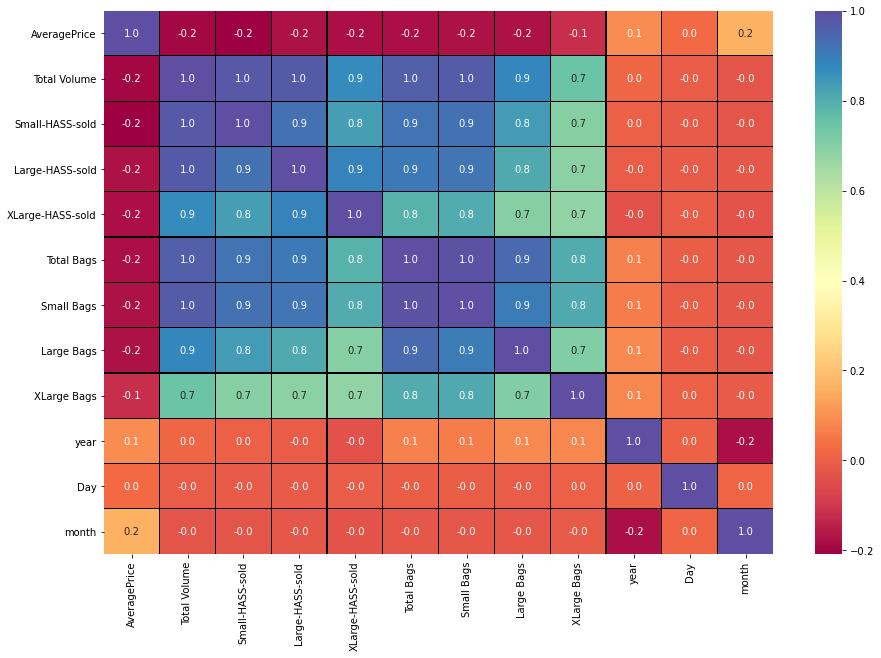

In [195]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

Observations:Area under ligther region are highly corelated and area under darker region is negatively corelated.

In [191]:
#lets again check the datatypes:
df.dtypes

Date                 object
AveragePrice        float64
Total Volume        float64
Small-HASS-sold     float64
Large-HASS-sold     float64
XLarge-HASS-sold    float64
Total Bags          float64
Small Bags          float64
Large Bags          float64
XLarge Bags         float64
type                 object
year                  int64
region               object
Day                   int64
month                 int64
dtype: object

In [192]:
#Lets drop date column:
df.drop(columns='Date',axis=1,inplace=True)

In [197]:
#using Label Encoder to convert Categorical data into neumeric:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ["type","region"] 
for col in columns:
    df[col] = le.fit_transform(df[col])

In [201]:
df.shape

(18249, 14)

In [198]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.

In [199]:
df.skew()

AveragePrice         0.580303
Total Volume         9.007687
Small-HASS-sold      8.648220
Large-HASS-sold      8.942466
XLarge-HASS-sold    10.159396
Total Bags           9.756072
Small Bags           9.540660
Large Bags           9.796455
XLarge Bags         13.139751
type                 0.000329
year                 0.215339
region               0.000030
Day                  0.014310
month                0.106617
dtype: float64

In [203]:
# we can clearly see the data are right Skewed hence we have to normalize it.

In [205]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [206]:
df.skew()

AveragePrice        0.138629
Total Volume        0.088098
Small-HASS-sold    -0.328195
Large-HASS-sold    -0.486654
XLarge-HASS-sold    0.099986
Total Bags         -0.218874
Small Bags         -0.622148
Large Bags         -0.547765
XLarge Bags         1.176494
type                0.000329
year                0.215339
region              0.000030
Day                 0.014310
month               0.106617
dtype: float64

In [207]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.

In [209]:
#Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (18249, 14)
After removal of outliers: (17928, 14)


In [213]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop('AveragePrice',axis=1)
y = df_final['AveragePrice']

In [214]:
#Lets check the shape of input and output values:
print(X.shape)
print(y.shape)

(17928, 13)
(17928,)


In [215]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [216]:
print(X_train.shape,'\t',X_test.shape)

(14342, 13) 	 (3586, 13)


In [217]:
print(y_train.shape,'\t',y_test.shape)

(14342,) 	 (3586,)


In [235]:
#Importing the Model for Predictions Process:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#Import Error Metrics:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [236]:
model = [LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
for m in model:
    m.fit(X_train,y_train)
    print("Score of",m, "is:",m.score(X_train,y_train))
    y_predict = m.predict(X_test)
    print("Error:")
    print('Mean absolute error:',mean_absolute_error(y_test,y_predict))
    print('Mean squared error:',mean_squared_error(y_test,y_predict))
    print('Root mean squared is ',np.sqrt(mean_squared_error(y_test,y_predict)))
    print('r2 score is:',r2_score(y_test,y_predict))
    print('******************************************************************')
    print('\n')

Score of LinearRegression() is: 0.5747784152882016
Error:
Mean absolute error: 0.0836749956400366
Mean squared error: 0.01118654331473044
Root mean squared is  0.10576645647241113
r2 score is: 0.5811570479687466
******************************************************************


Score of Lasso() is: 0.0
Error:
Mean absolute error: 0.1346749447497643
Mean squared error: 0.026708355432831985
Root mean squared is  0.1634269115930176
r2 score is: -5.642373617886776e-06
******************************************************************


Score of Ridge() is: 0.5747783481143127
Error:
Mean absolute error: 0.08367632202269185
Mean squared error: 0.011186574248738014
Root mean squared is  0.10576660270963616
r2 score is: 0.5811558897475977
******************************************************************


Score of ElasticNet() is: 0.0
Error:
Mean absolute error: 0.1346749447497643
Mean squared error: 0.026708355432831985
Root mean squared is  0.1634269115930176
r2 score is: -5.6423736178867

In [237]:
#We are getting Maximum r2 Score with Random forest Regressor Lets Implement it with Cross Validation:

In [238]:
#First lets check which feature are more important:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [239]:
print(selection.feature_importances_)

[0.0390746  0.07404688 0.06063063 0.03733469 0.04286349 0.03681502
 0.0725942  0.01324217 0.38550018 0.07885279 0.04973828 0.01297542
 0.09633167]


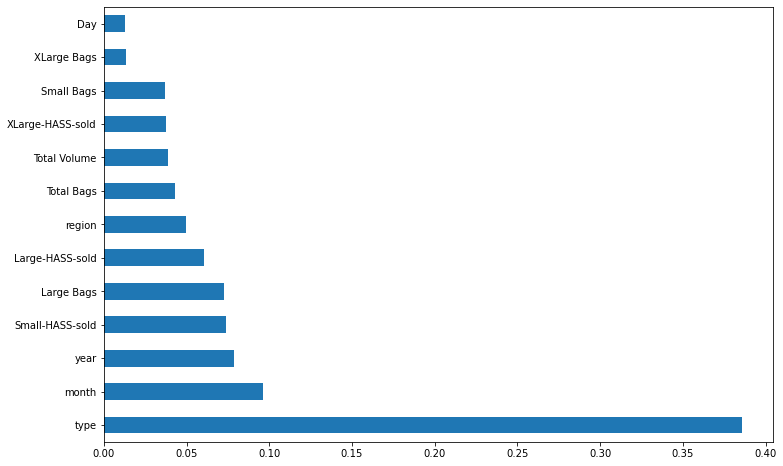

In [240]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [242]:
#Importing Random Forest:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [243]:
#Hyperparametre Tuning:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [244]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [245]:
#Random search of parameters, using 5 fold cross validation:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [246]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  25.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  26.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  26.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  27.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  27.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  38.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 32.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [247]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [248]:
prediction = rf_random.predict(X_test)

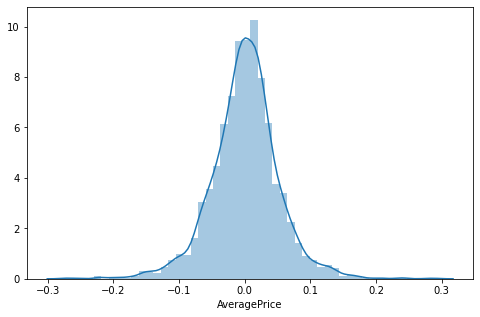

In [259]:
plt.figure(figsize = (8,5))
sns.distplot(y_test-prediction,bins=50)
plt.show()

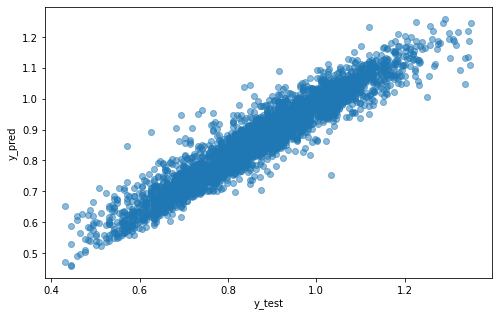

In [256]:
plt.figure(figsize = (8,5))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [253]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.03802004526934341
MSE: 0.002690998664730385
RMSE: 0.051874836527264205


In [254]:
metrics.r2_score(y_test, prediction)

0.8992444946631849

****We can also solve this probelm by using classification by considering Avocado Type as Dependant Variable and other as independant Variable

In [260]:
#Lets Import The Dataset Again:
df = pd.read_csv('C:\\Users\\MI Laptop\\Downloads\\avocado.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(18249, 14)


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [261]:
#Dropping unnecessary Columns:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [282]:
#checking the value_count for type column:
df['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [262]:
#Lets do some feature Engineering:
#renaming the columns name of 4046,4225,4770
df.rename(columns={'4046':'Small-HASS-sold','4225':'Large-HASS-sold','4770':'XLarge-HASS-sold'}, inplace=True)

In [ ]:
#From description we can see that Date is a object data type,Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

In [263]:
df['Day'] = pd.to_datetime(df['Date'], format="%Y/%m/%d").dt.day

In [264]:
df['month'] = pd.to_datetime(df['Date'], format="%Y/%m/%d").dt.month

In [266]:
#Lets drop date column:
df.drop(columns='Date',axis=1,inplace=True)

In [276]:
df.dtypes

AveragePrice        float64
Total Volume        float64
Small-HASS-sold     float64
Large-HASS-sold     float64
XLarge-HASS-sold    float64
Total Bags          float64
Small Bags          float64
Large Bags          float64
XLarge Bags         float64
type                  int32
year                  int64
region                int32
Day                   int64
month                 int64
dtype: object

In [267]:
#using Label Encoder to convert Categorical data into neumeric:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ["type","region"] 
for col in columns:
    df[col] = le.fit_transform(df[col])

In [268]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.

In [269]:
df.skew()

AveragePrice         0.580303
Total Volume         9.007687
Small-HASS-sold      8.648220
Large-HASS-sold      8.942466
XLarge-HASS-sold    10.159396
Total Bags           9.756072
Small Bags           9.540660
Large Bags           9.796455
XLarge Bags         13.139751
type                 0.000329
year                 0.215339
region               0.000030
Day                  0.014310
month                0.106617
dtype: float64

In [270]:
# we can clearly see the data are right Skewed hence we have to normalize it.

In [271]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [272]:
df.skew()

AveragePrice        0.138629
Total Volume        0.088098
Small-HASS-sold    -0.328195
Large-HASS-sold    -0.486654
XLarge-HASS-sold    0.099986
Total Bags         -0.218874
Small Bags         -0.622148
Large Bags         -0.547765
XLarge Bags         1.176494
type                0.000329
year                0.215339
region              0.000030
Day                 0.014310
month               0.106617
dtype: float64

In [300]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.

In [274]:
#Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (18249, 14)
After removal of outliers: (17928, 14)


In [280]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop('type',axis=1)
y = df_final['type']

In [281]:
#Lets check the shape of input and output values:
print(X.shape)
print(y.shape)

(17928, 13)
(17928,)


In [283]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [284]:
print(X_train.shape,'\t',X_test.shape)

(14342, 13) 	 (3586, 13)


In [285]:
print(y_train.shape,'\t',y_test.shape)

(14342,) 	 (3586,)


In [286]:
#Implementing Algorithim for predictions:
from sklearn.model_selection import cross_val_score
def classify(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    print("Accuracy Score of model is:",model.score(X_test,y_test))
    score = cross_val_score(model,X,y,cv=5)
    print("Cross validation is",np.mean(score)*100)

In [287]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy Score of model is: 0.939765755716676
Cross validation is 92.9551401273043


In [288]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy Score of model is: 0.9913552704963748
Cross validation is 96.9879128580774


In [289]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model, X, y)

Accuracy Score of model is: 0.9880089235917456
Cross validation is 97.46209534832889


In [290]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy Score of model is: 0.9969325153374233
Cross validation is 98.70586606367083


****As Random Forest Classifier is giving Max Accuracy Lets Implement it and check the scores:

accuracy_score: 0.9966536530953709
[[1845    3]
 [   9 1729]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1848
           1       1.00      0.99      1.00      1738

    accuracy                           1.00      3586
   macro avg       1.00      1.00      1.00      3586
weighted avg       1.00      1.00      1.00      3586



Text(0.5, 76.01999999999997, 'Predicted label')

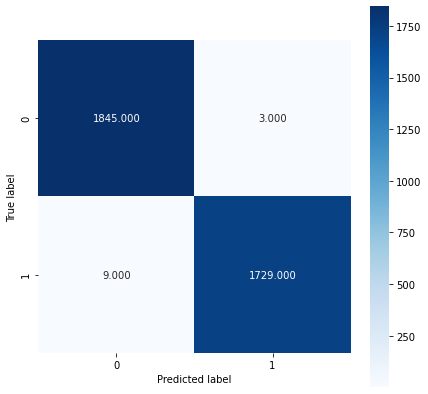

In [292]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_predict= classifier.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size":10}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

****Saving the best Model:

In [293]:
import joblib
joblib.dump(classifier,'classifier.obj')
classifier_from_joblib = joblib.load('classifier.obj')
classifier_from_joblib.predict(X_test)

array([0, 1, 0, ..., 0, 1, 0])